In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import numpy as np 
sns.set();

C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [9]:
df = pd.read_excel("../data/coalpublic2014.xls", header=2, index_col="MSHA ID")

In [10]:
df.head()

,Year,Mine Name,Mine State,Mine County,Mine Status,Mine Type,Company Type,Operation Type,Operating Company,Operating Company Address,Union Code,Coal Supply Region,Production (short tons),Average Employees,Labor Hours
MSHA ID,,,,,,,,,,,,,,,
103381,2014,Jesse Creek H.W.M.,Alabama,Bibb,Active,Surface,Indepedent Producer Operator,Mine only,"Jesse Creek Mining,llc","1615 Kent Dairy Rd, Alabaster, AL 35007",NaN,Appalachia Southern,71758,6,10494
100759,2014,North River #1 Underground Min,Alabama,Fayette,"Active, men working, not producing",Underground,Indepedent Producer Operator,Preparation Plant,Jim Walter Resources Inc,"3114 County Rd 63 S, Berry, AL 35546",United Mine Workers Of America,Appalachia Southern,0,10,20144
103246,2014,Bear Creek,Alabama,Franklin,Active,Surface,Indepedent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","912 Edenton Street, Birmingham, AL 35242",NaN,Appalachia Southern,40263,17,27476
103451,2014,Knight Mine,Alabama,Franklin,Active,Surface,Indepedent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","P.O. Box 354, Lynn, AL 35242",NaN,Appalachia Southern,100425,21,35560
100329,2014,Concord Mine,Alabama,Jefferson,Active,Underground,Operating Subsidiary,Preparation Plant,Oak Grove Resources Llc,"8360 Taylors Ferry Rd, Hueytown, AL 35023",United Mine Workers Of America,Appalachia Southern,0,58,134504


In [11]:
df.columns

Index(['Year', 'Mine Name', 'Mine State', 'Mine County', 'Mine Status',
       'Mine Type', 'Company Type', 'Operation Type', 'Operating Company',
       'Operating Company Address', 'Union Code', 'Coal Supply Region',
       'Production (short tons)', 'Average Employees', 'Labor Hours'],
      dtype='object')

In [12]:
df['Company Type'].unique()

array(['Indepedent Producer Operator', 'Operating Subsidiary', 'Contractor'], dtype=object)

In [15]:
df['Company Type'].replace(to_replace='Indepedent Producer Operator',value='Independent Producer Operator',inplace=True)

In [16]:
df.rename(columns=lambda x: x.replace(" ","_"), inplace=True)

In [17]:
df.columns

Index(['Year', 'Mine_Name', 'Mine_State', 'Mine_County', 'Mine_Status',
       'Mine_Type', 'Company_Type', 'Operation_Type', 'Operating_Company',
       'Operating_Company_Address', 'Union_Code', 'Coal_Supply_Region',
       'Production_(short_tons)', 'Average_Employees', 'Labor_Hours'],
      dtype='object')

In [18]:
len(df)

1360

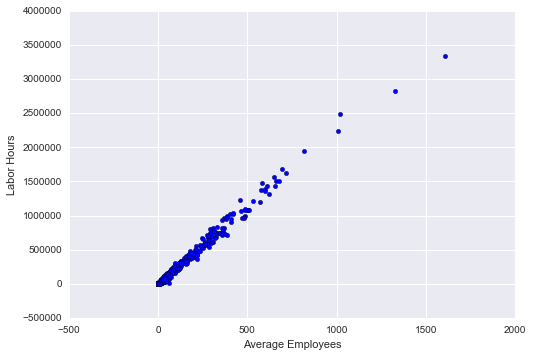

In [21]:
plt.scatter(df.Average_Employees,df.Labor_Hours)
plt.xlabel("Average Employees")
plt.ylabel("Labor Hours")

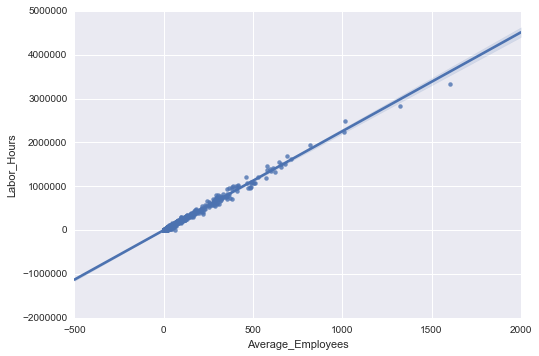

In [23]:
sns.regplot(df.Average_Employees,df.Labor_Hours)
plt.savefig("../figures/201626_0630_135219"+"-employees_vs_hours.png")

In [24]:
for i in df.columns:
    print (i)

Year
Mine_Name
Mine_State
Mine_County
Mine_Status
Mine_Type
Company_Type
Operation_Type
Operating_Company
Operating_Company_Address
Union_Code
Coal_Supply_Region
Production_(short_tons)
Average_Employees
Labor_Hours


In [25]:
# We remove non production site 
df = df[df['Production_(short_tons)'] >0]

In [26]:
len(df)

985

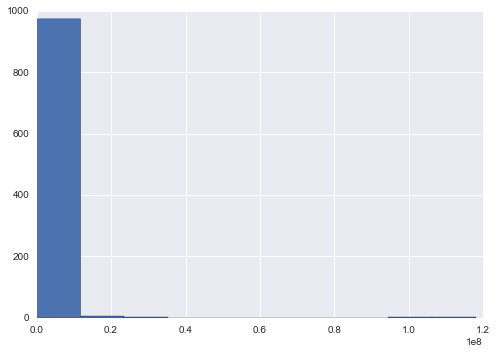

In [27]:
df['Production_(short_tons)'].hist()

In [29]:
df['log_production'] = np.log(df['Production_(short_tons)'])

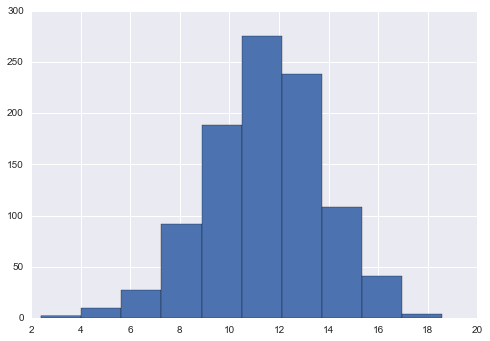

In [30]:
df.log_production.hist()

In [31]:
df.to_csv("../data/cleaned_coalplublic2014.csv")